# <span style="color: red;">*DIASTER TWEETS NLP: MODEL SELECTION*</span> 

### Ray Ling
### MSDS 458

# <span style="color: darkblue;">EDA</span>

In [113]:
import numpy as np 
import pandas as pd 

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping
from keras.metrics import Precision, Recall


from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

In [114]:
train= pd.read_csv("/Users/lzy23/Desktop/458/Final Project/train.csv")
test=pd.read_csv("/Users/lzy23/Desktop/458/Final Project/test.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [115]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [116]:
print('************************************training data******************************************')
print(train.info())
print('************************************testing data******************************************')
print(test.info())

************************************training data******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
************************************testing data******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
No

In [117]:
import itertools
from scipy.stats import norm, skew, mode
import re
import gc
import string
import warnings 
import operator

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [118]:
train.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


In [119]:
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 7613 rows and 5 columns in train
There are 3263 rows and 4 columns in test


## Characters in tweets

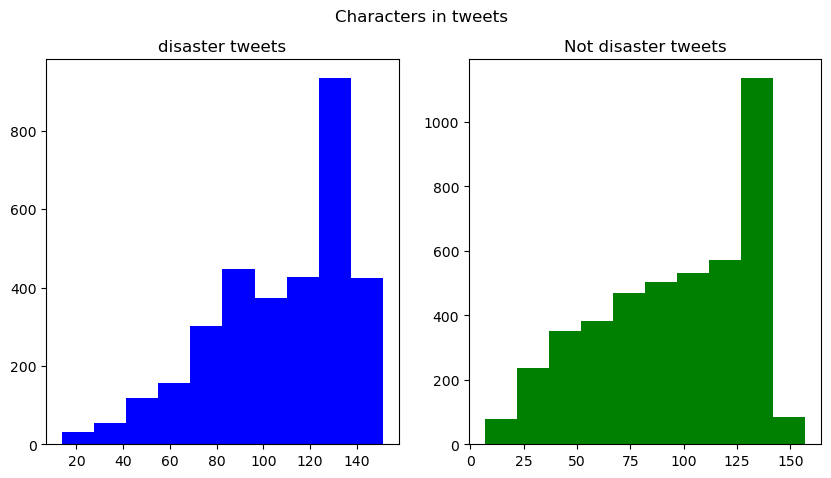

In [120]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweet_len=train[train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')

tweet_len=train[train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')

fig.suptitle('Characters in tweets')
plt.show()

## Words in tweets

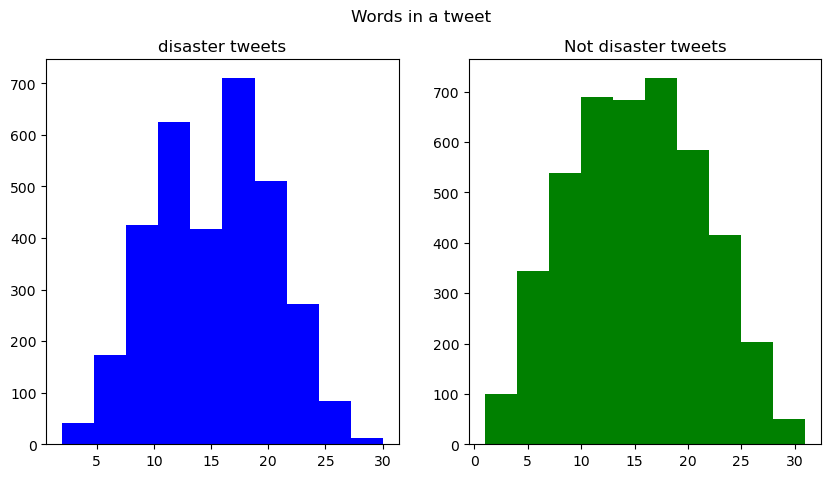

In [121]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')

tweet_len=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')

plt.show()

In [100]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


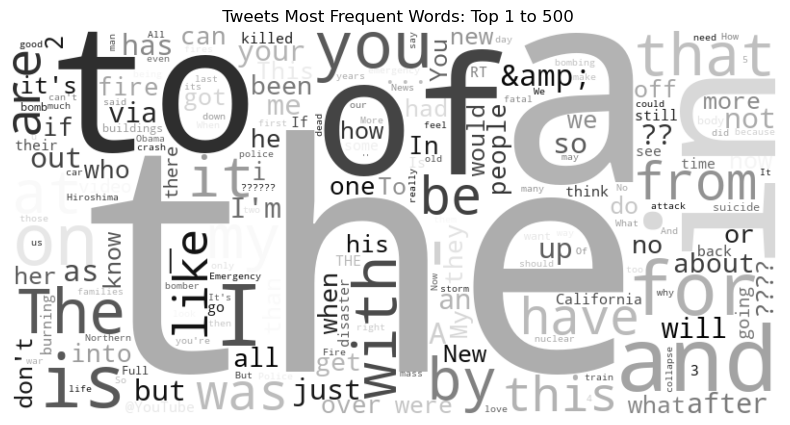

In [101]:
from collections import Counter, defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def generate_wordcloud(df, start, end, colormap='viridis',target='', word='Words'):
    frequency = df.str.split().explode().value_counts()
    words = frequency.index[start:end].tolist()
    counts = frequency.values[start:end].tolist()
    wordcloud_dict = {words[i]: counts[i] for i in range(len(words))}
    wordcloud = WordCloud(width=800, height=400, background_color='white',colormap=colormap).generate_from_frequencies(wordcloud_dict)
    
    plt.figure(figsize=(12, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{target} Tweets Most Frequent {word}: Top {start+1} to {end}')
    plt.axis('off')
    plt.show()

generate_wordcloud(train['text'], 0, 500, colormap= 'gray')

Text(0.5, 1.0, 'Positive 1 (Disaster Tweets) Percentage: 43.0%')

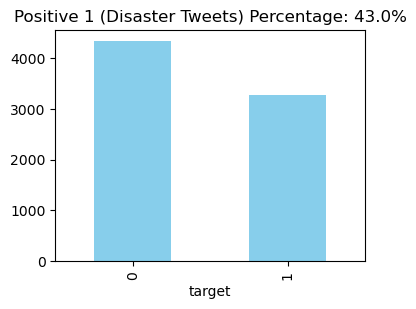

In [80]:
plt.figure(figsize=(4, 3))
train.target.value_counts().plot(kind='bar',color='skyblue')
plt.title(f'Positive 1 (Disaster Tweets) Percentage: {round(train.target.value_counts()[1]/train.shape[0]*100,0)}%')

Negative "Message Length" skewness: 0.068573 and kurtosis: -0.733013
Positive "Message Length" skewness: 0.104245 and kurtosis: 0.339425


/var/folders/xf/_kfz96491cxd6115r1qrp5380000gn/T/ipykernel_34950/1459879266.py:15: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


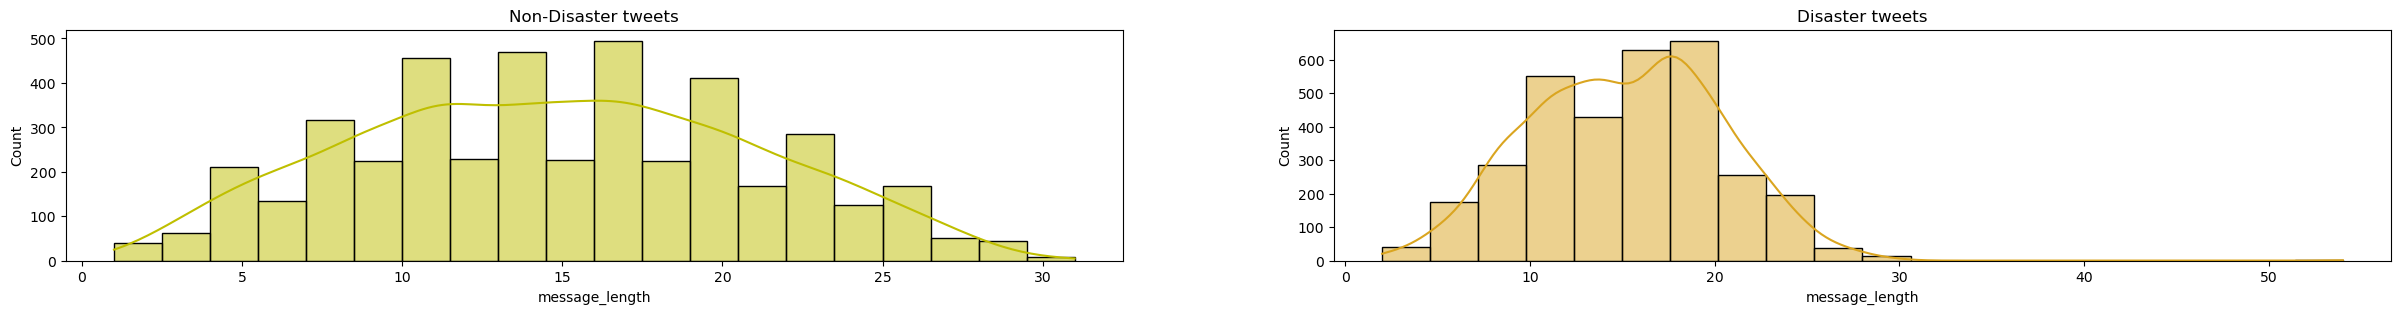

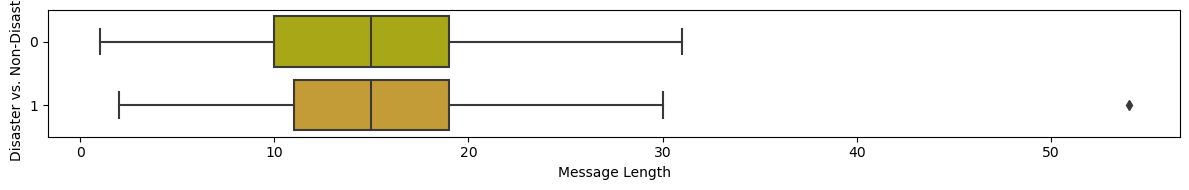

In [102]:
# Create 'message_length' field in copy of train data
def plot_message_length(df):
        df_copy = df.copy()
        df_copy['message_length'] = df_copy['text'].apply(lambda x: len(x.split(" ")))
        print("Negative \"Message Length\" skewness: %f and kurtosis: %f" % 
              (df_copy[df_copy['target'] == 0]['message_length'].skew(), 
               df_copy[df_copy['target'] == 0]['message_length'].kurt()))

        print("Positive \"Message Length\" skewness: %f and kurtosis: %f" % 
              (df_copy[df_copy['target'] == 1]['message_length'].skew(), 
               df_copy[df_copy['target'] == 1]['message_length'].kurt()))

        #Check distribution 
        plt.figure(figsize=(30,3))
        with pd.option_context('mode.use_inf_as_na', True):
            plt.subplot(1, 2, 1)
            sns.histplot(df_copy[df_copy['target'] == 0]['message_length'], kde=True, bins=20, color='y')
            plt.title("Non-Disaster tweets")

            plt.subplot(1, 2, 2)
            sns.histplot(df_copy[df_copy['target'] == 1]['message_length'], kde=True, bins=20, color='goldenrod')
            plt.title("Disaster tweets")
  
        plt.figure(figsize=(12, 2))
        sns.boxplot(data=df_copy, y='target', x='message_length', palette={0: 'y', 1: 'goldenrod'}, orient='h')
        plt.xlabel('Message Length')
        plt.ylabel('Disaster vs. Non-Disaster')
        
        plt.tight_layout()
        plt.show()
        
plot_message_length(train)

Words in training: 32017
Words in testing: 17426
Words in testing not in training: 9823
Words in both testing and training: 41747


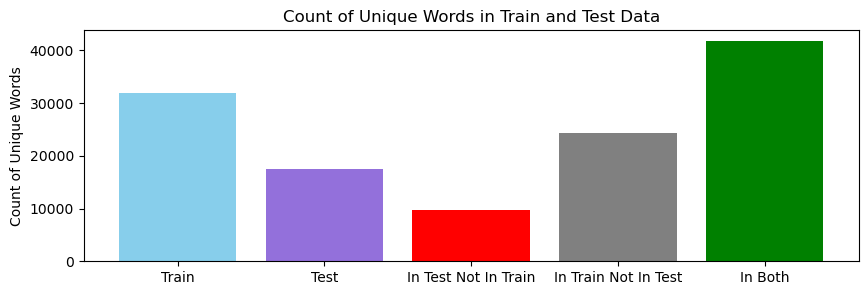

Some sample words in testing not in training:
 ['http://t.co/CV0mrisFt3', 'http://t.co/jBlGyLCsAy', 'Again-Spiritual', 'WATCH:', 'st', 'result.', '@noobde', 'http://t.co/lz8xmyi75x', '#stamford', 'http://t.co/MlaxoJ1kCJ', 'Vista', 'http://t.co/a7iqMhvLSm', '11:38am', 'sleet', 'throws', 'Smalls', '1.57', 'http://t.co/fSx2H9XAkI', 'http://t.co/qKP30b4ag2', 'http://t.co/Yr9mmIS7jT', 'http://t.co/KtTYiTOw64', 'Mull', 'multitudinal', 'people/forests/wildlife/water', 'http://t.co/veh1seVDKO', '04', 'terrifying.', 'receipt.', 'http://t.co/JATvPAT0MO', 'elsewere', 'www', '@1233newcastle', 'SHTFPlan!', 'http://t.co/8WDTTzpTXH', 'crumbly', 'https://t.co/WO2T0K4zXi', 'https://t.co/WJsCdvCevH', 'http://t.co/1zFGk9ET5v', 'continue.', 'SH', 'about)', 'https://t.co/Y0WE0wXQCp', '#FeelTheBern', 'Seattle\x89Ûªs', '@JadeForMKX', 'http://t.co/VJRHkmHpu2', '@_Gags_', 'weeks!', 'http://t.co/672bY6OOjn', 'glowng', 'bottom.', 'complex.', '#album', 'Hihow', 'slipping.', '@joanna_bomb', '@Its2015America', 'PRO

In [103]:
# Unqiue words
def unique_words_train_test(col, n=600):
        # First let's check number of unique words in training and testing
        unique_words_train = len(train[col].str.split(" ").explode().unique())
        unique_words_test = len(test[col].str.split(" ").explode().unique())

        # Find words in test not in train
        unique_words_train_list = set(train[col].str.split().explode().unique())
        unique_words_test_list = set(test[col].str.split().explode().unique())
        words_in_test_not_train = list(unique_words_test_list.difference(unique_words_train_list))
        words_in_train_not_test = list(unique_words_train_list.difference(unique_words_test_list))
        words_in_both_train_and_test = list(unique_words_train_list.union(unique_words_test_list))
        
        # Some output
        print("Words in training:", unique_words_train)
        print("Words in testing:", unique_words_test)
        print("Words in testing not in training:", len(words_in_test_not_train))
        print("Words in both testing and training:", len(words_in_both_train_and_test))

        # plot
        plt.figure(figsize=(10,3))
        plt.bar(['Train', 'Test','In Test Not In Train','In Train Not In Test',"In Both"], [unique_words_train, unique_words_test, len(words_in_test_not_train), len(words_in_train_not_test), len(words_in_both_train_and_test)], 
                 color=['skyblue', 'mediumpurple','red','gray','green'])
        plt.title('Count of Unique Words in Train and Test Data')
        plt.ylabel('Count of Unique Words')
        plt.show()
        
        print("Some sample words in testing not in training:\n", words_in_test_not_train[:100])
unique_words_train_test('text')

# N Grams

In [125]:
def ngram_freqplot(df, color='skyblue', target=" "):
    fig, axs = plt.subplots(1, 3, figsize=(20,10))  
    for i in range(1, 4):
        # Use CountVectorizer to get ngram
        vectorizer = CountVectorizer(ngram_range=(i, i), stop_words='english')
        ngram_train = vectorizer.fit_transform(df['text'])

        # Calculate the frequency of each n-gram and store in dictionary 
        ngram_freq = ngram_train.sum(axis=0)
        feature_names = vectorizer.get_feature_names_out()
        ngram_dict = {feature_names[j]: ngram_freq[0, j] for j in range(len(feature_names))}
        
        # Filter out n-grams containing URLs
        ngram_dict = {ngram: freq for ngram, freq in ngram_dict.items() if not re.match(r'(http|https)', ngram)}
        
        sorted_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)

        # top n-grams 
        top_n = 30 
        top_ngrams = [item[0] for item in sorted_ngrams[:top_n]]
        top_frequencies = [item[1] for item in sorted_ngrams[:top_n]]

        # bar plot
        axs[i-1].barh(top_ngrams, top_frequencies, color=color)
        axs[i-1].set_title(f'{target} tweet top 30 {i}-gram ')
        axs[i-1].invert_yaxis()  # want highest frequency at the top
        axs[i-1].tick_params(axis='x') 

        # font size for the words 
        for tick in axs[i-1].get_yticklabels():
            tick.set_fontsize(15)
    plt.tight_layout()

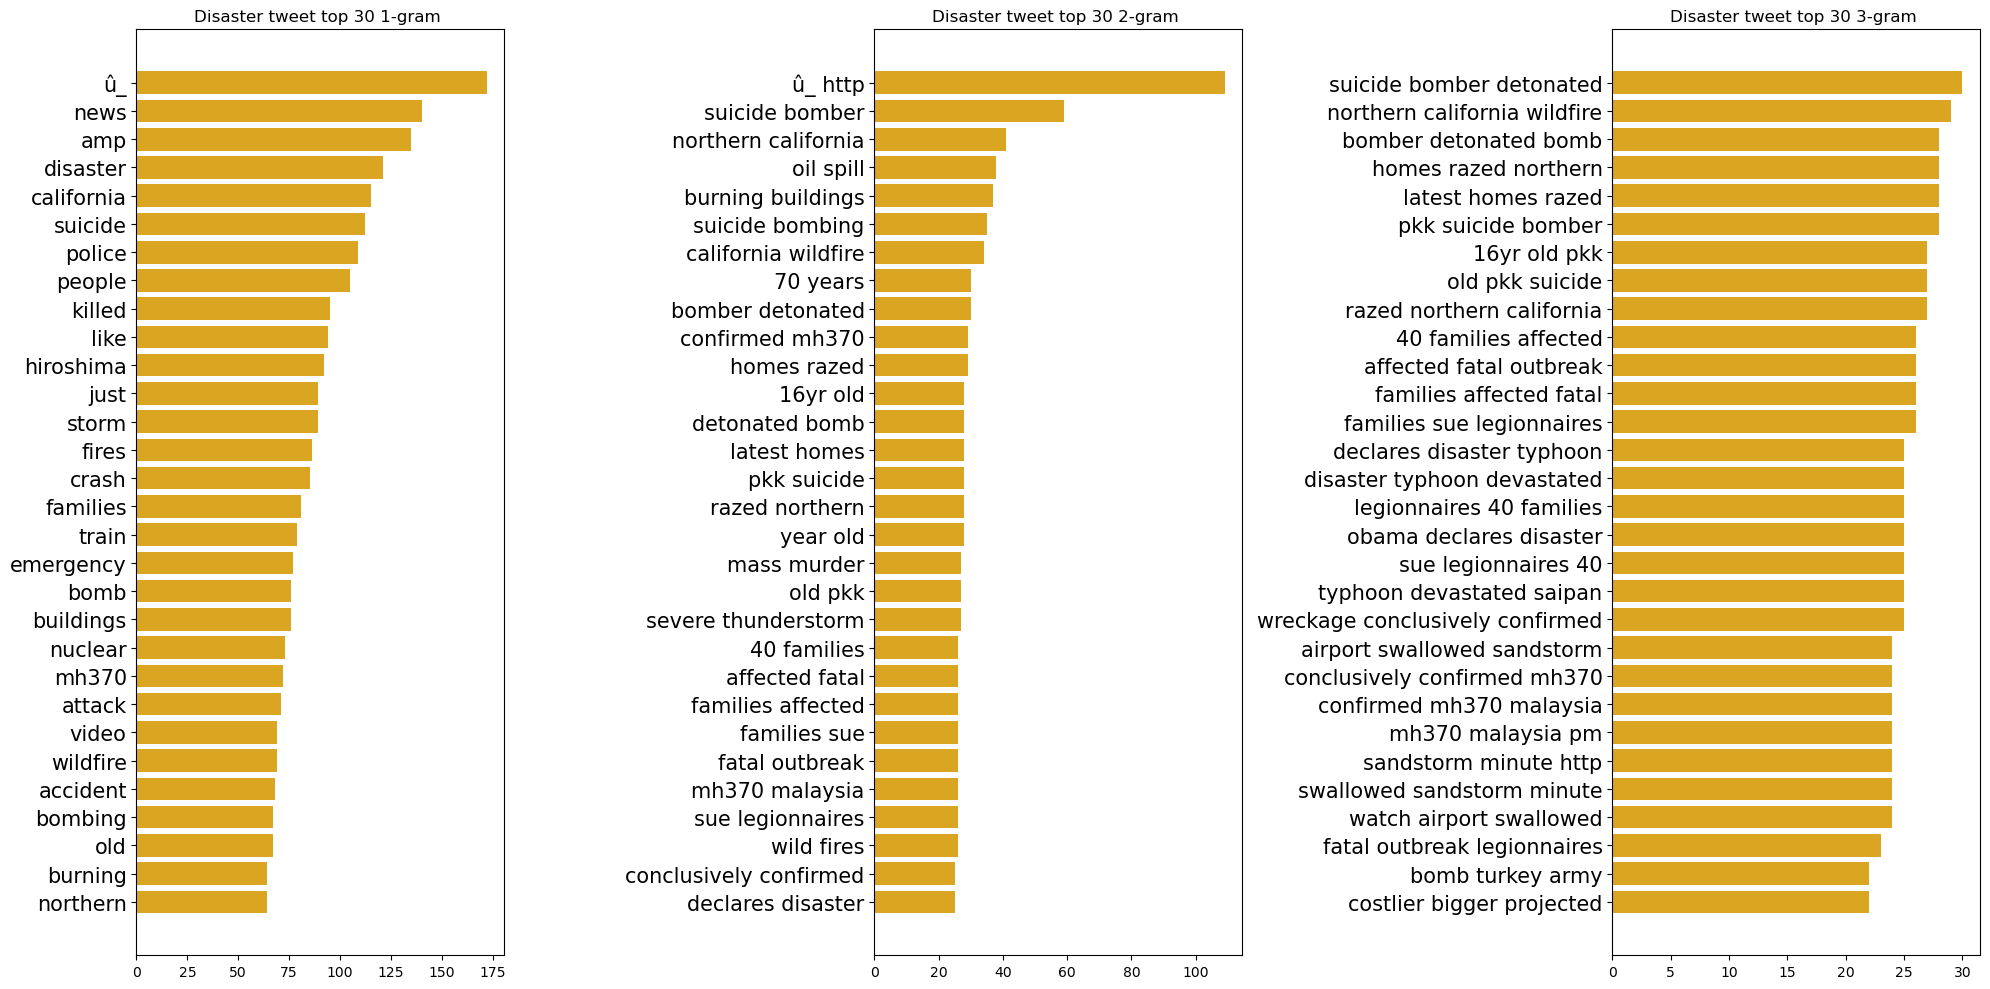

In [107]:
# Disaster tweets
ngram_freqplot(train[train['target']==1], color='goldenrod', target="Disaster")

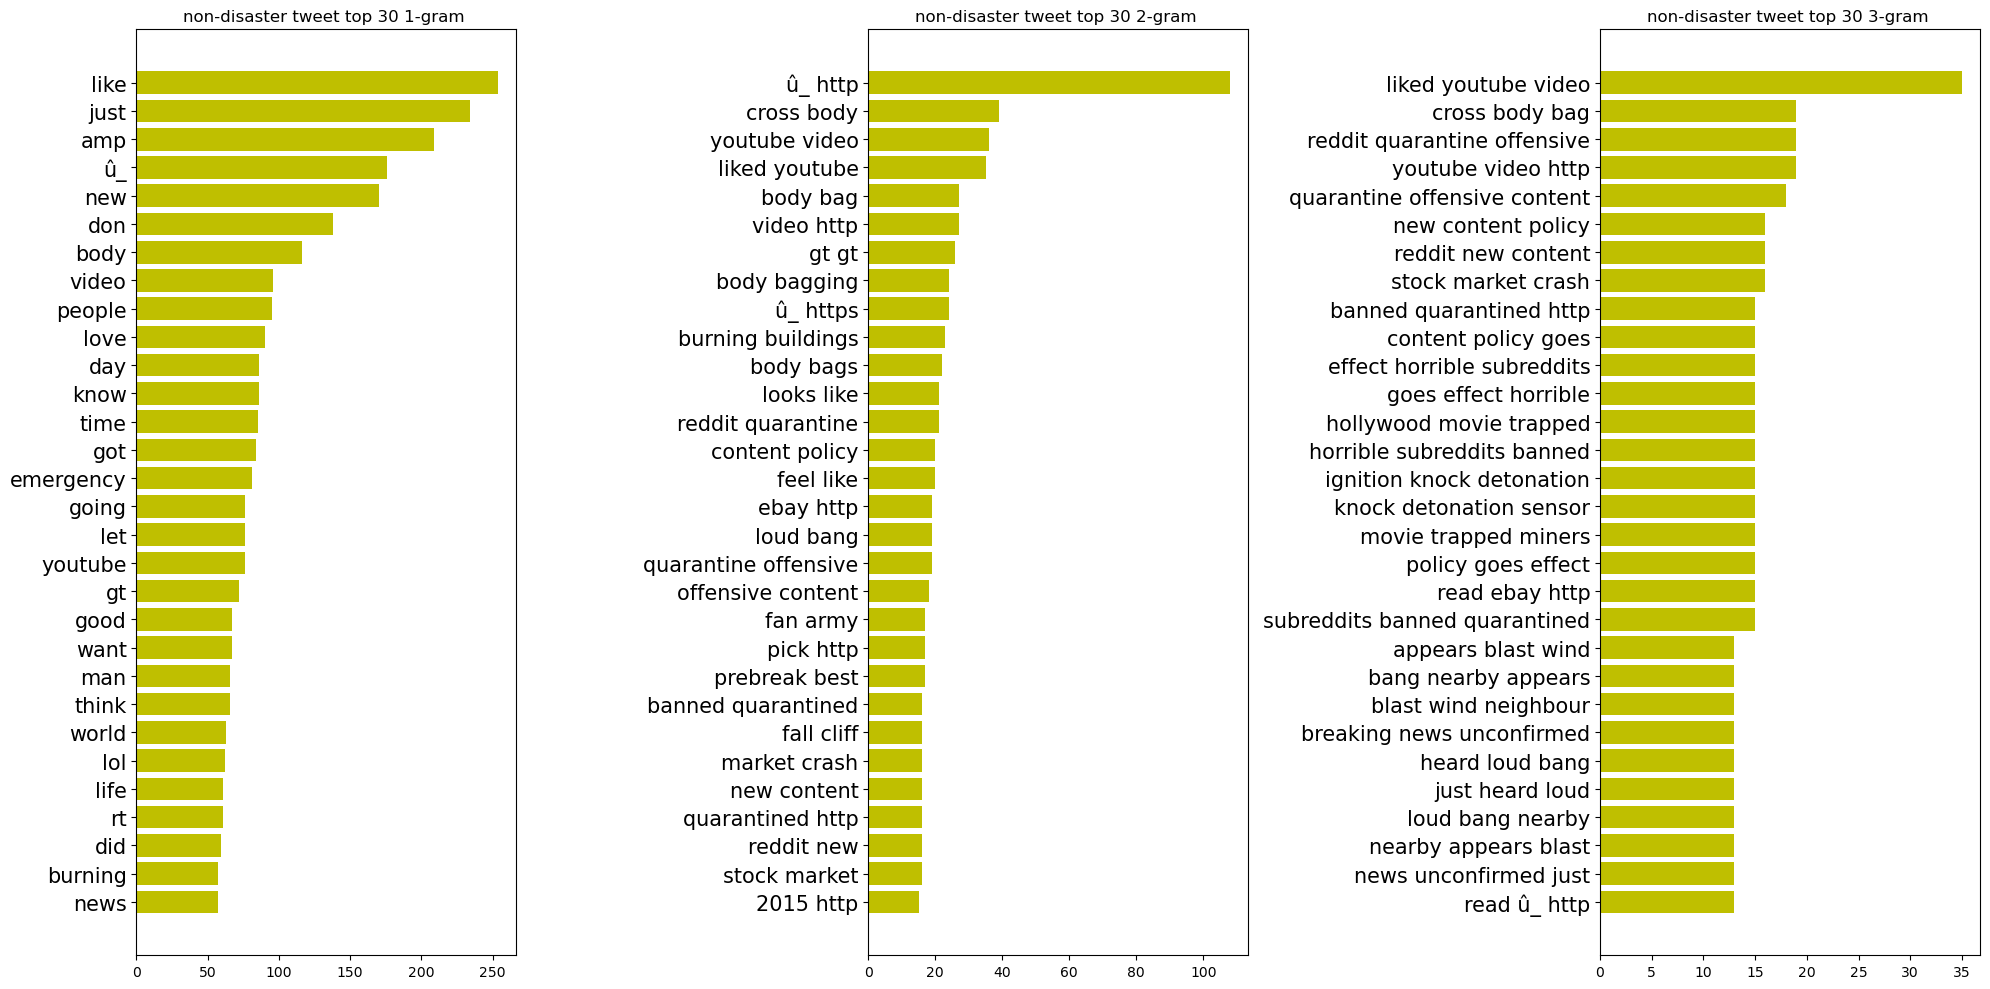

In [126]:
# non-disaster tweets
ngram_freqplot(train[train['target']==0], color='y', target ='non-disaster')

# NULL VALUE

In [123]:
print('************************************training data******************************************')
print('null values:\n',train.isnull().agg(['sum','mean'], axis=0))
print('Duplicated rows: ',train.duplicated().sum(axis=0))
print('Duplicated IDs: ',train.id.duplicated().sum(axis=0))
print('************************************testing data******************************************')
print('null values:\n',test.isnull().agg(['sum','mean'], axis=0))
print('Duplicates rows: ',train.duplicated().sum(axis=0))
print('Duplicated IDs: ',test.id.duplicated().sum(axis=0))
train_pos=train[train['target']==1]
train_neg=train[train['target']==0]
print('************************************training data - non-disaster******************************************')
print('null values:\n',train_pos.isnull().agg(['sum','mean'], axis=0))
print('************************************training data - disaster ******************************************')
print('null values:\n',train_neg.isnull().agg(['sum','mean'], axis=0))


************************************training data******************************************
null values:
        id    keyword    location  text  target
sum   0.0  61.000000  2533.00000   0.0     0.0
mean  0.0   0.008013     0.33272   0.0     0.0
Duplicated rows:  0
Duplicated IDs:  0
************************************testing data******************************************
null values:
        id    keyword     location  text
sum   0.0  26.000000  1105.000000   0.0
mean  0.0   0.007968     0.338645   0.0
Duplicates rows:  0
Duplicated IDs:  0
************************************training data - non-disaster******************************************
null values:
        id   keyword     location  text  target
sum   0.0  42.00000  1075.000000   0.0     0.0
mean  0.0   0.01284     0.328646   0.0     0.0
************************************training data - disaster ******************************************
null values:
        id    keyword    location  text  target
sum   0.0  19.000000  1

# Data Cleaning

In [140]:
# function for text preprocessing
def text_preprocessing(text):
   # remove hyperlinks
    text = str(text)
    text = re.sub(r'((http|https)://\S+)', '', text)

    # ... and ..
    text = text.replace('...', ' ... ')
    if '...' not in text:
        text = text.replace('..', ' ... ')  
        
    # Seperate words from punctuations 
    punctuations = '@#!.?+&*[]-%:/();$=><|{}^' + "'`"
    for p in punctuations:
        text  = text.replace(p, f' {p} ')

     
    return text


In [128]:
# Text preprocessing
train['clean_text']= train['text'].apply(lambda t : text_preprocessing(t))
test['clean_text']= test['text'].apply(lambda t : text_preprocessing(t))

Words in training: 21884
Words in testing: 12939
Words in testing not in training: 5600
Words in both testing and training: 27166


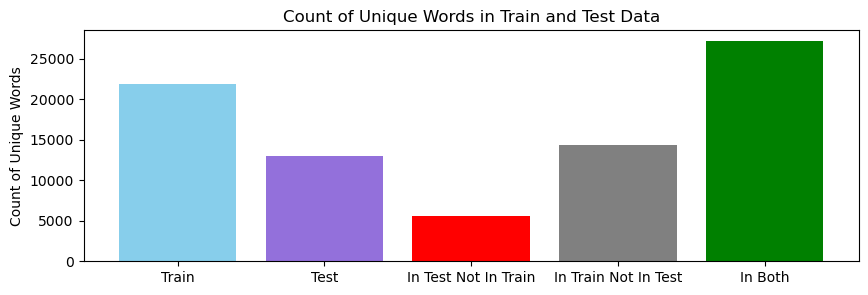

Some sample words in testing not in training:
 ['Ramona', 'Viral', 'audiobook', 'McKenzieBlackw1', 'racism', 'SnowBackSunday', 'timeshighered', 'Vista', 'gtiso', 'DefundPP', 'shrnnclbautista', 'sleet', 'throws', 'Smalls', 'footballfreestyle24', 'multitudinal', 'Mull', 'xodeemorgss', 'RNB', 'elsewere', 'crumbly', 'ShojoShit', 'ErasureIsNotEquality', 'SH', 'deray', 'jackienatalydlt', 'Seattle\x89Ûªs', 'gmanews', 'zouis', 'Babypicturethis', 'sothathappened', 'glowng', 'Hihow', 'PROPERLY', 'AlbertBreer', 'Banjo', 'truely', 'knockout', 'MattBacal8', 'kaytlinmartinez', 'Diamond6612', 'TEXT', 'wider', 'snackwave_julie', 'wave\x89Û_', 'Communities', 'Harrison', 'hussars', 'Chronicles', 'Hale', 'Musketeiro', 'tyme', 'lastword', '8427', 'Currong', 'FarhanKVirk', 'Schoolboy', 'coz', 'Cancel', 'Draenor', 'hamburger', 'hotdogs', 'mortgage', 'reliable', 'Clay', 'rival', 'spoiler', 'ReasonVsFear', 'abounds', 'HORN\x89Û_', 'Saam', 'Dropped', 'Capsule', 'intrusion', 'escuchando', '_keypsters', 'wmur', 

In [129]:
unique_words_train_test('clean_text',n=100)

# Model 1: SVM

In [130]:
X_train = train.drop("target", axis = 1)
y_train = train["target"]
X_test = test

In [131]:
X_train

,id,keyword,location,text,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this # earthquake...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask . Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,All residents asked to ' shelter in place ' ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...","13,000 people receive # wildfires evacuation ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby # Alaska a...
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,Two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,@ aria_ahrary @ TheTawniest The out of contr...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,M1 . 94 [ 01 : 04 UTC ] ? 5km S of Volcano H...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,Police investigating after an e - bike collide...


In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [136]:
svm_classifier = SVC(kernel='linear', C=0.1)

In [137]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train["clean_text"])
X_test_vectorized = vectorizer.transform(X_test["text"])

In [138]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

for fold, (train_index, test_index) in enumerate(stratified_kfold.split(X_train_vectorized, y_train)):
    print(f"Training model for Fold {fold+1}")
    
    X_fold_train, X_fold_test = X_train_vectorized[train_index], X_train_vectorized[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    svm_classifier.fit(X_fold_train, y_fold_train)
    
    predictions = svm_classifier.predict(X_fold_test)
    
    f1 = f1_score(y_fold_test, predictions)
    
    f1_scores.append(f1)
    print(f"Fold {fold+1} F1-score: {f1}")

# Display average F1-score across folds
print()
print(f"Average F1-score across folds: {np.mean(f1_scores)}")

Training model for Fold 1
Fold 1 F1-score: 0.7510620220900597
Training model for Fold 2
Fold 2 F1-score: 0.7491525423728813
Training model for Fold 3
Fold 3 F1-score: 0.732394366197183
Training model for Fold 4
Fold 4 F1-score: 0.7491408934707904
Training model for Fold 5
Fold 5 F1-score: 0.7661016949152541

Average F1-score across folds: 0.7495703038092337


# Model 2: Baseline Model

In [9]:
# Train_test split
TEST_SIZE=0.2
y = train['target']
X_train, X_val, y_train, y_val = train_test_split(train, 
                                                      y, 
                                                      test_size=TEST_SIZE, 
                                                      random_state=100) 

In [10]:
# Tokenizer using Tensorflow Keras
VOCAB_SIZE = 21884
OOV_TOKEN ="<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words= VOCAB_SIZE , split=' ', oov_token=OOV_TOKEN)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(X_train['clean_text']) 
word_index = tokenizer.word_index

# Generate and pad sequences
sequences_train = tokenizer.texts_to_sequences(X_train['clean_text'].values)
padded_train = pad_sequences(sequences_train)
max_length = max(len(seq) for seq in padded_train)# Find maximum sequence length

sequences_val = tokenizer.texts_to_sequences(X_val['clean_text'].values)
padded_val = pad_sequences(sequences_val, maxlen=max_length, truncating='post')

sequences_test = tokenizer.texts_to_sequences(test['clean_text'].values)
padded_test = pad_sequences(sequences_test,maxlen=max_length, truncating='post')

print("Maximum sequence length:", max_length)


Maximum sequence length: 36


In [11]:
# Build the model
EMBEDDED_DIM = 25
MAX_LEN = max_length
LEARNING_RATE = 0.001

model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDED_DIM,  input_length=MAX_LEN),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
 

# Setup the training parameters
initial_learning_rate = LEARNING_RATE

# Compile the model with binary_crossentropy loss, Adam optimizer, and standard metrics
model1.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])

# Print the model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 36, 25)            547100    
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 dense (Dense)               (None, 6)                 5406      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 552513 (2.11 MB)
Trainable params: 552513 (2.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
NUM_EPOCHS = 5
BATCH_SIZE = 128

# Train the model
history_model1 = model1.fit(padded_train, y_train, epochs=NUM_EPOCHS, validation_data=(padded_val, y_val), batch_size = BATCH_SIZE)

Epoch 1/5
48/48 [==============================] - 2s 15ms/step - loss: 0.6866 - accuracy: 0.5644 - recall: 0.1126 - precision: 0.4728 - val_loss: 0.6784 - val_accuracy: 0.5785 - val_recall: 0.0153 - val_precision: 1.0000
Epoch 2/5
48/48 [==============================] - 0s 8ms/step - loss: 0.6391 - accuracy: 0.6706 - recall: 0.2654 - precision: 0.8945 - val_loss: 0.6014 - val_accuracy: 0.7341 - val_recall: 0.5736 - val_precision: 0.7465
Epoch 3/5
48/48 [==============================] - 0s 8ms/step - loss: 0.4623 - accuracy: 0.8502 - recall: 0.7232 - precision: 0.9101 - val_loss: 0.4893 - val_accuracy: 0.7748 - val_recall: 0.5782 - val_precision: 0.8472
Epoch 4/5
48/48 [==============================] - 0s 8ms/step - loss: 0.2839 - accuracy: 0.9176 - recall: 0.8446 - precision: 0.9588 - val_loss: 0.4556 - val_accuracy: 0.7971 - val_recall: 0.6902 - val_precision: 0.8079
Epoch 5/5
48/48 [==============================] - 0s 8ms/step - loss: 0.1730 - accuracy: 0.9575 - recall: 0.9225 -

In [46]:
# Plot results function
def plot_results(history, model_name="", early_stopping_callback=None):
    metrics = ['accuracy', 'loss', 'precision', 'recall']
    titles = [f'{model_name} Accuracy', f'{model_name} Loss', f'{model_name} Precision', f'{model_name} Recall', f'{model_name} F1 Score']
        
    # Calculate F1 score for training and validation data
    train_precision = history.history['precision']
    train_recall = history.history['recall']
    train_f1_scores = [2 * (train_precision[i] * train_recall[i]) / (train_precision[i] + train_recall[i] + 1e-8)
                   for i in range(len(train_precision))]  # Avoid division by zero
    
    val_precision = history.history['val_precision']
    val_recall = history.history['val_recall']
    val_f1_scores = [2 * (val_precision[i] * val_recall[i]) / (val_precision[i] + val_recall[i] + 1e-8)
                     for i in range(len(val_precision))]  # Avoid division by zero
    
    fig, axs = plt.subplots(3, 2, figsize=(20, 15))

    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        axs[row, col].plot(history.history[metric])
        axs[row, col].plot(history.history[f'val_{metric}'])
        axs[row, col].set_title(titles[i], fontsize=20)  
        axs[row, col].tick_params(axis='both', which='major', labelsize=20)  
        axs[row, col].legend(['Train', 'Validate'], loc='upper left', fontsize=20)

    # Plot F1 score 
    axs[-1, 0].plot(train_f1_scores)
    axs[-1, 0].plot(val_f1_scores)
    axs[-1, 0].set_title(titles[-1], fontsize=20)  
    axs[-1, 0].tick_params(axis='both', which='major', labelsize=20)  
    axs[-1, 0].legend(['Train', 'Validate'], loc='upper left', fontsize=20)
 
    if early_stopping_callback is not None:
        # return best accuracy and corresponding metrics if early stopping
        val_accuracy = history.history['val_accuracy']
        best_index = np.argmax(val_accuracy)
        best_accuracy = val_accuracy[best_index]
        best_precision = val_precision[best_index]
        best_recall = val_recall[best_index]
        best_f1_score = val_f1_scores[best_index]
        return best_accuracy, best_precision, best_recall, best_f1_score
    else:
        # no early stopping callback
        return history.history['val_accuracy'][-1],  val_precision[-1],val_recall[-1],  val_f1_scores[-1]

    plt.tight_layout()
    plt.show()


In [43]:
# Confusion matrix
def plot_cfm(model, X, y_actual, model_name=""):
        # predictions
        pred_prob = model.predict(padded_val)
        pred_prob = np.transpose(pred_prob)[0]
        y_pred = list(map(lambda x: 0 if x < 0.5 else 1, pred_prob))

        #confusion Matrix
        cfm= confusion_matrix(y_val, y_pred)
        plt.figure(figsize=(1, 1))
        display = ConfusionMatrixDisplay(confusion_matrix=cfm) 
        display.plot(cmap='Greens')
        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.gcf().set_size_inches(4, 3) 
        plt.show()
        return y_pred
        


48/48 [==============================] - 0s 2ms/step


<Figure size 100x100 with 0 Axes>

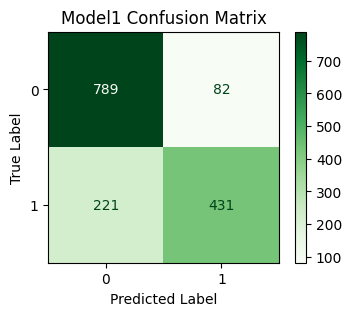

In [44]:
y_pred_model1=plot_cfm(model1,X=padded_val, y_actual= y_val, model_name='Model1')

# Model 3: RNN (LSTM)

In [20]:
# Build the model 3
# hyper-papameters
EMBEDDED_DIM =25
MAX_LEN = max_length
LEARNING_RATE = 0.0005
DECAY_STEPS = 100 
DECAY_RATE = 0.5
LAYER1_UNIT=64
LAYER2_UNIT=32
DROP_OUT1=0.8
DROP_OUTBI1=0.8
DROP_OUTBI2=0.8
NUM_EPOCHS = 10
BATCH_SIZE = 128


model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDED_DIM,  input_length=MAX_LEN),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LAYER1_UNIT, return_sequences=True,dropout=DROP_OUTBI1,recurrent_dropout=DROP_OUTBI1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LAYER2_UNIT,  dropout=DROP_OUTBI2,recurrent_dropout=DROP_OUTBI2)),
    tf.keras.layers.Dropout(DROP_OUT1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
model3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])


model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 36, 25)            547100    
                                                                 
 bidirectional (Bidirection  (None, 36, 128)           46080     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 634461 (2.42 MB)
Trainable params: 63446

In [21]:
# Train the model
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

history_model3 = model3.fit(padded_train, y_train, epochs=NUM_EPOCHS, 
                            validation_data=(padded_val, y_val), 
                            batch_size=BATCH_SIZE,
                           callbacks=early_stopping_callback)

Epoch 1/10
48/48 [==============================] - 22s 188ms/step - loss: 0.6877 - accuracy: 0.5629 - recall: 0.0577 - precision: 0.4377 - val_loss: 0.6823 - val_accuracy: 0.5719 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/10
48/48 [==============================] - 7s 155ms/step - loss: 0.6837 - accuracy: 0.5696 - recall: 0.0050 - precision: 0.4643 - val_loss: 0.6783 - val_accuracy: 0.5719 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/10
48/48 [==============================] - 7s 156ms/step - loss: 0.6726 - accuracy: 0.5754 - recall: 0.0225 - precision: 0.6941 - val_loss: 0.6561 - val_accuracy: 0.6133 - val_recall: 0.1043 - val_precision: 0.9315
Epoch 4/10
48/48 [==============================] - 7s 154ms/step - loss: 0.5854 - accuracy: 0.7126 - recall: 0.4887 - precision: 0.7569 - val_loss: 0.5029 - val_accuracy: 0.7630 - val_recall: 0.7485 - val_precision: 0.7124
Epoch 5/10
48/48 [==============================] - 8s 164ms/step - loss: 0.4735 - accu

model 3 accuracy 0.7806959748268127
model 3 precision 0.729106605052948
model 3 recall 0.7760736346244812
f1 score 0.7518573448374986


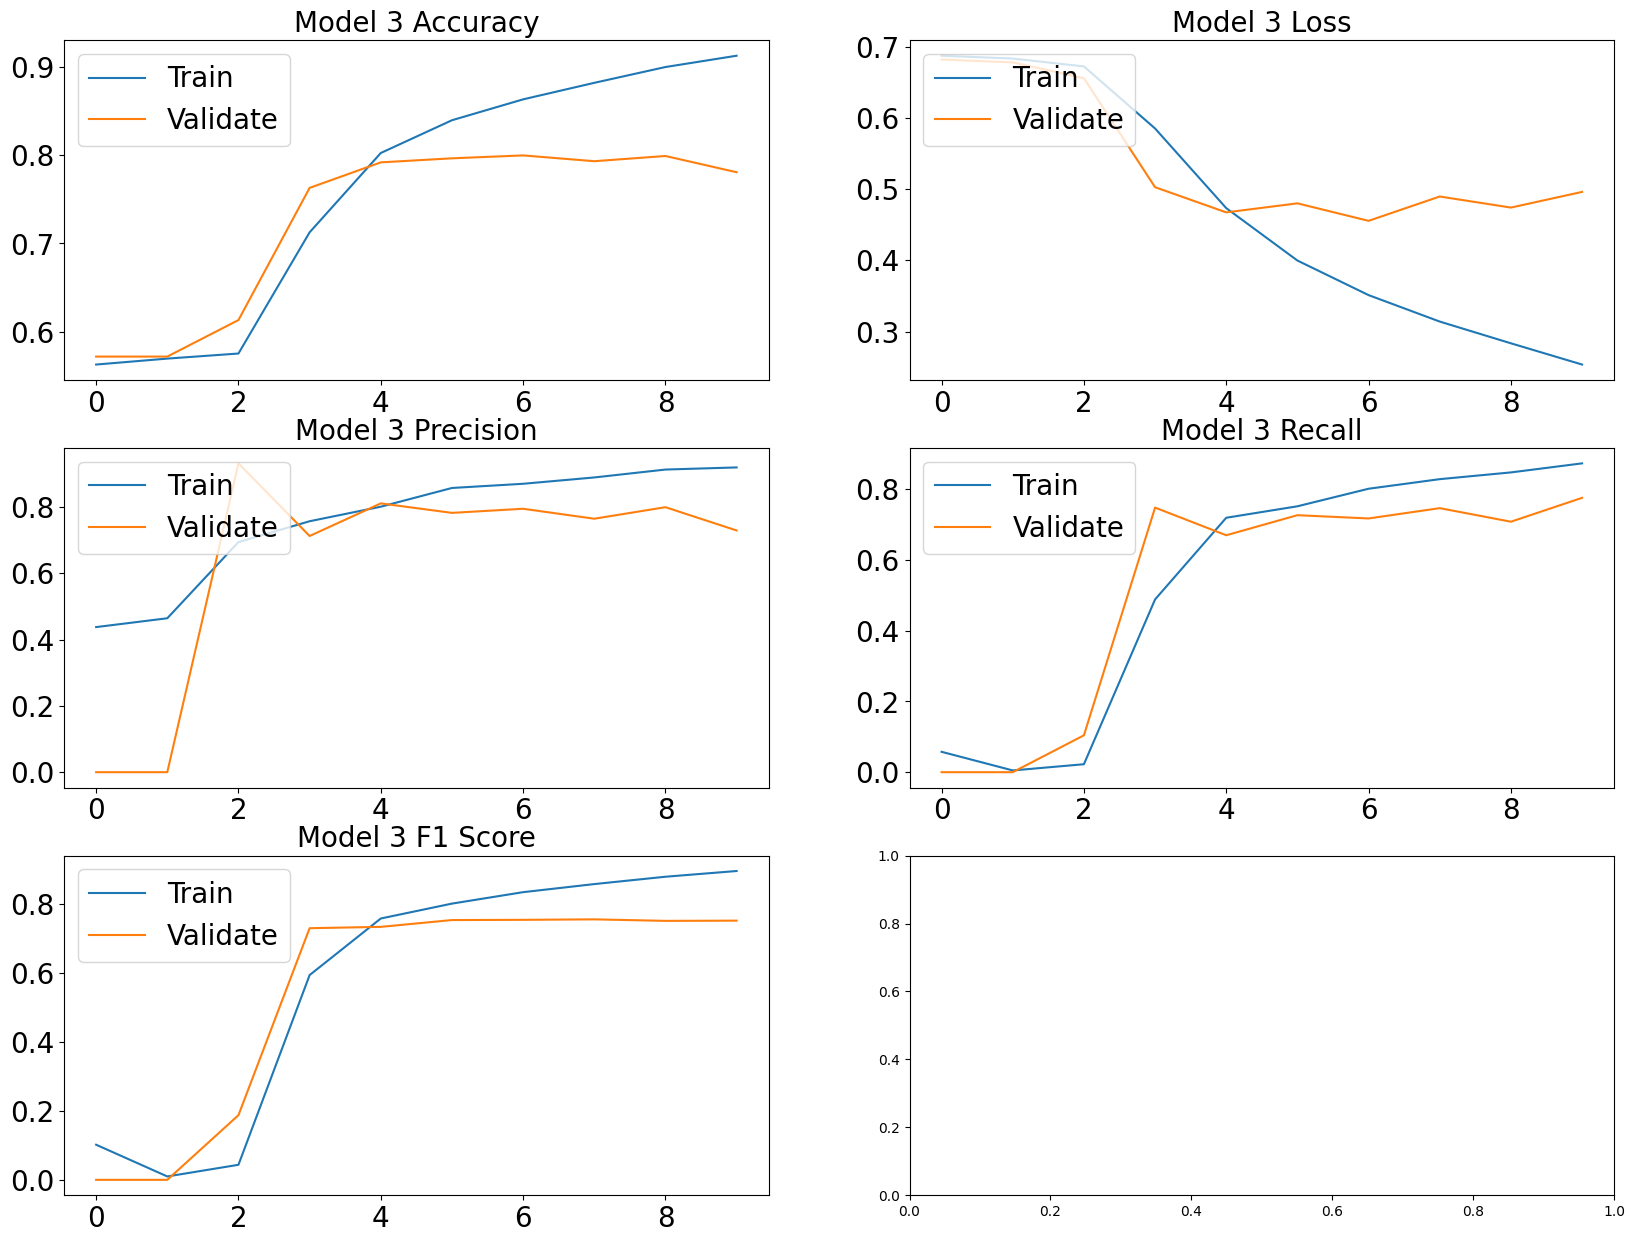

In [26]:
# Plot results
model3_val_accuracy, model3_val_precision, model3_val_recall ,model3_val_f1_scores = plot_results(history_model3,model_name='Model 3' )
print('model 3 accuracy', model3_val_accuracy)
print("model 3 precision", model3_val_precision)
print("model 3 recall",model3_val_recall)
print("f1 score",model3_val_f1_scores)

48/48 [==============================] - 2s 14ms/step


<Figure size 100x100 with 0 Axes>

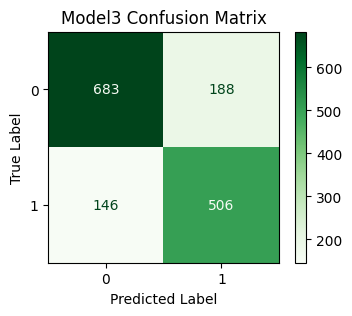

In [34]:
y_pred_model3=plot_cfm(model3,X=padded_val, y_actual= y_val, model_name='Model3')

In [35]:
# Take a look at false positive tweets
# Get indices
fp_indices = np.where((np.array(y_pred_model3)== 1) & (y_val == 0))[0]
fn_indices = np.where((np.array(y_pred_model3)== 1) & (y_val == 1))[0]

# False positive
print('****************************** Non-disaster tweets predicted as disaster tweets (False Positive) ***********************************')
indices = np.random.choice(fp_indices,10, replace=False)
for i in indices:
    print(f'text{i}\n', X_val.iloc[i]['clean_text'] )
    
#  False negative
print('****************************** Disaster tweets predicted as disaster tweets (False Negative) ***********************************')
indices = np.random.choice(fn_indices,10,replace=False)
for i in indices:
    print(f'text{i}\n',X_val.iloc[i]['clean_text'] )

****************************** Non-disaster tweets predicted as disaster tweets (False Positive) ***********************************
text1278
  @ Robot_Rainstorm I ' m . sort of interested in what fonts they ' re using . 
text1028
 Santa Fe Springs Studebaker Rd  /  South St  *  * Trfc Collision - No Inj *  *  
text1402
  @ nalathekoala As a health care professional that deals all gun violence sequalae I consider suicides injuries accidents and homicides
text1389
  @ sholt87  @ MtGrotto  @ Eco11C  @ carlsbadbugkil1 Saved us ? Bush lowered tax rate for wealthy n economy collapsed w / Middle Class 401ks destroyed . 
text1451
 Evildead  -  Annihilation of Civilization 
text704
 Jeep Cherokee Owners File Lawsuit Against Fiat Chrysler Harman After Hackers   .  .  .    -  The Consumerist   # mcgsecure
text1281
 Quirk Injury Law ' s News is out !   Stories via  @ dantmatrafajlo
text843
 ÛÏThe road to power is paved with hypocrisy and casualties . Û  # FrancisUnderwood  # HoC 
text113
  @ L

# Model 4: Adding GloVe Embedding to LSTM

In [36]:
# load glove embeddings dictionary
glove_embeddings = np.load('../input/pickled-glove840b300d-for-10sec-loading/glove.840B.300d.pkl', allow_pickle=True)

In [37]:
# Build vocabulary for tweets
def build_vocab(X):
    texts = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for text in texts: 
        for word in text: 
                vocab[word]=  vocab.get(word,0) + 1     
    return vocab

def check_embeddings_coverage(X, embeddings):
    vocab = build_vocab(X)    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(train['clean_text'], glove_embeddings)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(test['clean_text'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))


GloVe Embeddings cover 80.17% of vocabulary and 96.10% of text in Training Set
GloVe Embeddings cover 83.62% of vocabulary and 95.87% of text in Test Set


In [38]:
# Embedding matrix for GloVe word vectors

# get vacab size from embedding
VOCAB_SIZE = len(glove_embeddings)
EMBEDDED_DIM = len(next(iter(glove_embeddings.values())))
print('vacab size: ', VOCAB_SIZE ,'\n','embedding dim: ', EMBEDDED_DIM )

# Embeddomg matrix from tokenizer created before
embedding_matrix = np.zeros((VOCAB_SIZE,EMBEDDED_DIM))
for word, i in tokenizer.word_index.items():
    embedding_vector = glove_embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

vacab size:  2196008 
 embedding dim:  300


In [39]:
# after building embedding matrix, glove_embeddings dictionary can be deleted to save memory
del glove_embeddings, train_glove_oov, test_glove_oov
gc.collect()

103455

In [40]:
# Build the model 4

# hyper-papameters
MAX_LEN = max_length
LEARNING_RATE = 0.0005
DECAY_STEPS = 100 
DECAY_RATE = 0.5
LAYER1_UNIT,LAYER2_UNIT =64,32
DROP_OUT1,DROP_OUTBI1,DROP_OUTBI2 =0.3,0.3,0.3
NUM_EPOCHS = 18
BATCH_SIZE = 128

model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBEDDED_DIM,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_length,
                    trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LAYER1_UNIT, return_sequences=True,dropout=DROP_OUTBI1,recurrent_dropout=DROP_OUTBI1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LAYER2_UNIT,    dropout=DROP_OUTBI2,recurrent_dropout=DROP_OUTBI2)),
    tf.keras.layers.Dropout(DROP_OUT1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

model4.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])


model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 36, 300)           658802400 
                                                                 
 bidirectional_2 (Bidirecti  (None, 36, 128)           186880    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 659030561 (2.46 GB)
Trainable params: 22

In [41]:
# Train the model 
history_model4 = model4.fit(padded_train, y_train, epochs=NUM_EPOCHS, 
                            validation_data=(padded_val, y_val), 
                            batch_size=BATCH_SIZE, 
                            callbacks=[early_stopping_callback])

Epoch 1/18
48/48 [==============================] - 26s 286ms/step - loss: 0.5699 - accuracy: 0.7166 - recall: 0.5426 - precision: 0.7291 - val_loss: 0.4458 - val_accuracy: 0.8102 - val_recall: 0.7347 - val_precision: 0.8050
Epoch 2/18
48/48 [==============================] - 12s 252ms/step - loss: 0.4497 - accuracy: 0.7993 - recall: 0.7006 - precision: 0.8073 - val_loss: 0.4086 - val_accuracy: 0.8234 - val_recall: 0.7132 - val_precision: 0.8501
Epoch 3/18
48/48 [==============================] - 12s 254ms/step - loss: 0.4290 - accuracy: 0.8171 - recall: 0.7190 - precision: 0.8328 - val_loss: 0.4060 - val_accuracy: 0.8188 - val_recall: 0.6748 - val_precision: 0.8730
Epoch 4/18
48/48 [==============================] - 13s 261ms/step - loss: 0.4145 - accuracy: 0.8205 - recall: 0.7224 - precision: 0.8379 - val_loss: 0.3964 - val_accuracy: 0.8273 - val_recall: 0.7101 - val_precision: 0.8622
Epoch 5/18
48/48 [==============================] - 12s 252ms/step - loss: 0.3992 - accuracy: 0.8328

model 4 accuracy 0.829940915107727
model 4 precision 0.8527827858924866
model 4 recall 0.7285276055335999
model 4 f1 score 0.7857733693349964
48/48 [==============================] - 2s 18ms/step


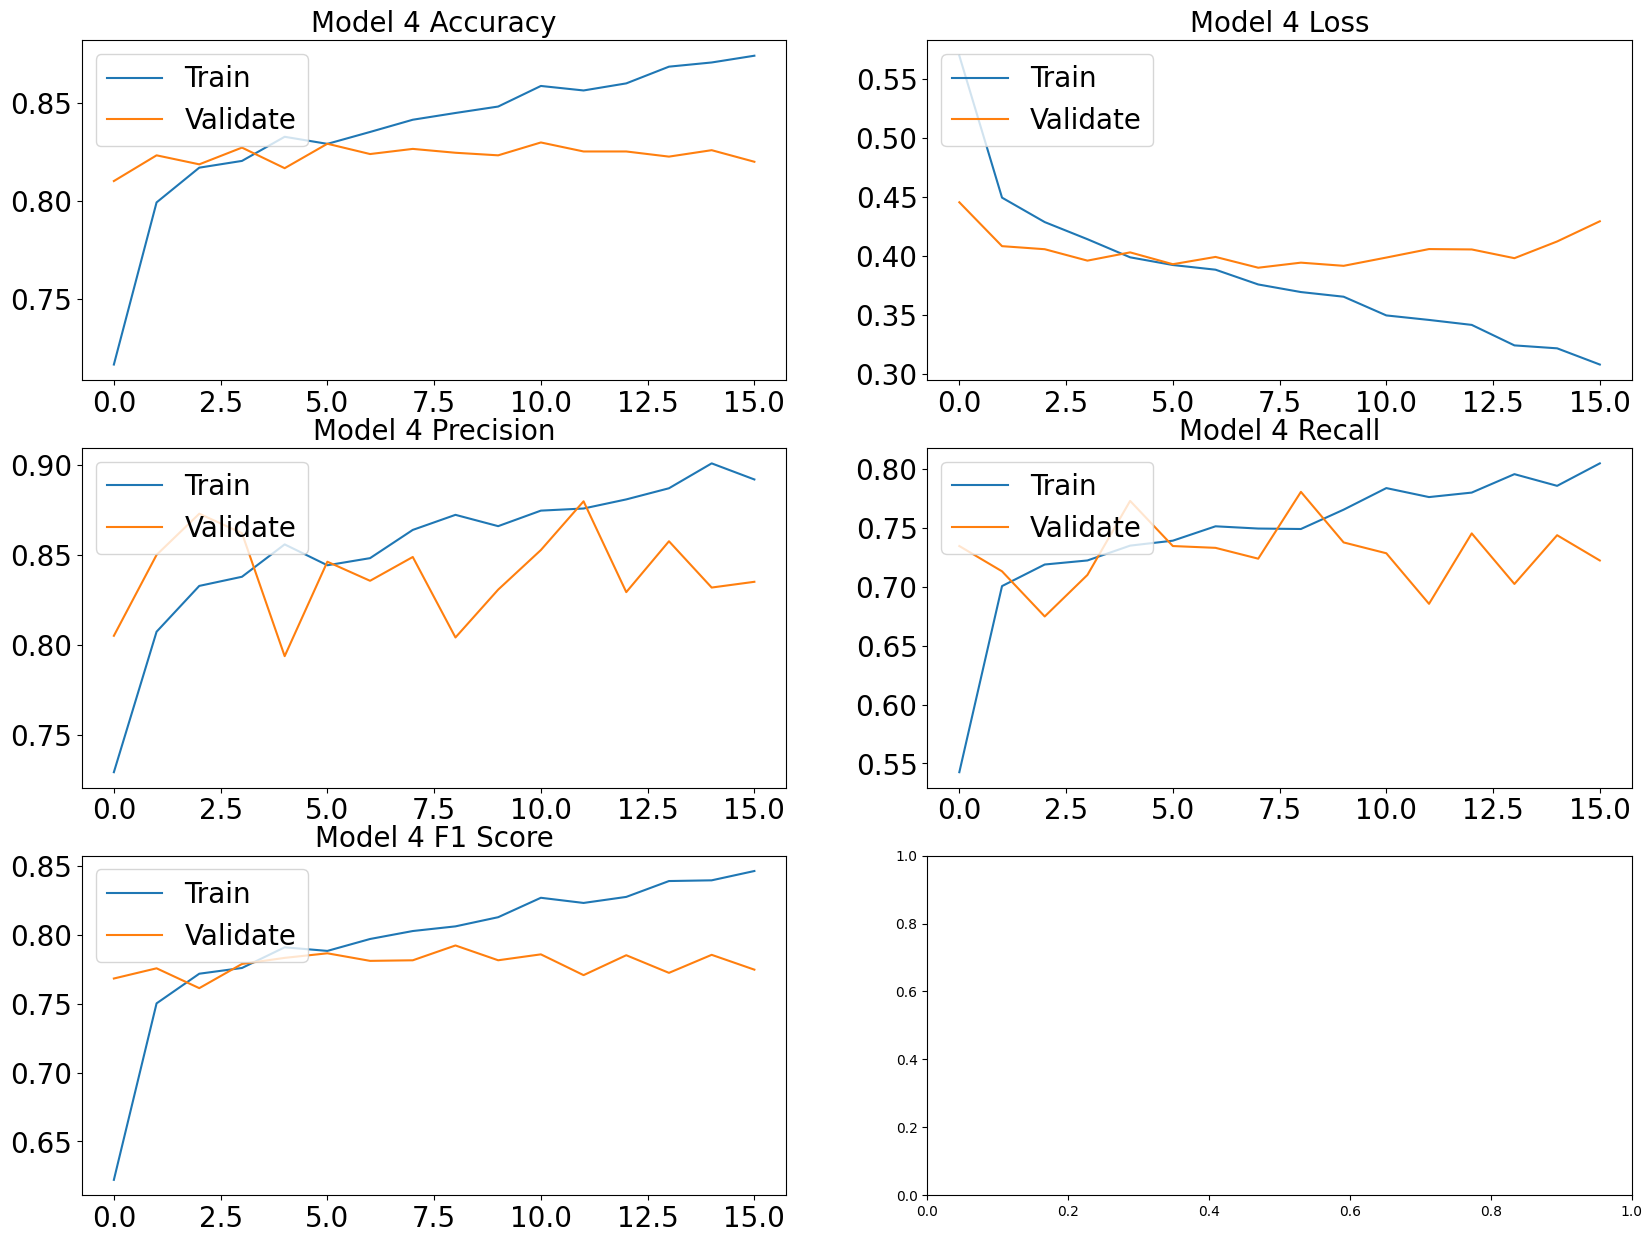

<Figure size 100x100 with 0 Axes>

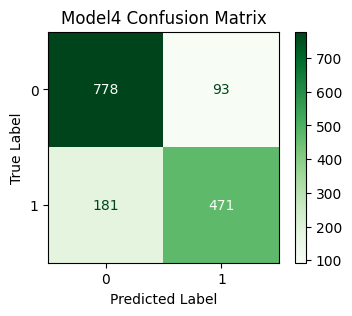

In [42]:
# Plot results
model4_val_accuracy, model4_val_precision, model4_val_recall ,mode41_val_f1_scores = plot_results(history_model4,model_name='Model 4', early_stopping_callback=early_stopping_callback )
print("model 4 accuracy", model4_val_accuracy)
print("model 4 precision", model4_val_precision)
print("model 4 recall",model4_val_recall)
print("model 4 f1 score",   mode41_val_f1_scores )

y_pred_model4=plot_cfm(model4,X=padded_val, y_actual= y_val, model_name='Model4')

The F1 score pump up to 0.79! That's a significant improvement. Seems GloVe does work here! next, let's take a look at the performance of GRU. It is a RNN very similar to LSTM but simplier and sometime work better with smaller data set.

# Model 5: Recurrent GRU Model

In [47]:
# Build the model 5

# hyper-papameters
MAX_LEN = max_length
LEARNING_RATE = 0.0005
DECAY_STEPS = 100 
DECAY_RATE = 0.5
LAYER1_UNIT,LAYER2_UNIT =64,64
DROP_OUT1,DROP_OUTBI1,DROP_OUTBI2 =0.3,0.3,0.3
NUM_EPOCHS = 18
BATCH_SIZE = 128

model5 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE,
                    output_dim=EMBEDDED_DIM,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_length,
                    trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(LAYER1_UNIT, return_sequences=True,dropout=DROP_OUTBI1,recurrent_dropout=DROP_OUTBI1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(LAYER2_UNIT,    dropout=DROP_OUTBI2,recurrent_dropout=DROP_OUTBI2)),
     tf.keras.layers.Dropout(DROP_OUT1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model 
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)

model5.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=LEARNING_RATE),
              metrics=['accuracy', tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.Precision(name='precision')])


model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 36, 300)           658802400 
                                                                 
 bidirectional_4 (Bidirecti  (None, 36, 128)           140544    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 659017569 (2.46 GB)
Trainable params: 21

In [48]:
# Train the model 
history_model5 = model5.fit(padded_train, y_train, epochs=NUM_EPOCHS, 
                            validation_data=(padded_val, y_val), 
                            batch_size=BATCH_SIZE, 
                            callbacks=[early_stopping_callback])

Epoch 1/18
48/48 [==============================] - 25s 276ms/step - loss: 0.5982 - accuracy: 0.6826 - recall: 0.4975 - precision: 0.6786 - val_loss: 0.4930 - val_accuracy: 0.7676 - val_recall: 0.7377 - val_precision: 0.7244
Epoch 2/18
48/48 [==============================] - 12s 246ms/step - loss: 0.4714 - accuracy: 0.7837 - recall: 0.7018 - precision: 0.7742 - val_loss: 0.4086 - val_accuracy: 0.8214 - val_recall: 0.7117 - val_precision: 0.8467
Epoch 3/18
48/48 [==============================] - 12s 244ms/step - loss: 0.4365 - accuracy: 0.8126 - recall: 0.7205 - precision: 0.8219 - val_loss: 0.4019 - val_accuracy: 0.8273 - val_recall: 0.7454 - val_precision: 0.8336
Epoch 4/18
48/48 [==============================] - 12s 251ms/step - loss: 0.4221 - accuracy: 0.8172 - recall: 0.7300 - precision: 0.8248 - val_loss: 0.3982 - val_accuracy: 0.8319 - val_recall: 0.7347 - val_precision: 0.8523
Epoch 5/18
48/48 [==============================] - 12s 245ms/step - loss: 0.4156 - accuracy: 0.8190

model 5 accuracy 0.8319107294082642
model 5 precision 0.8523131608963013
model 5 recall 0.7346625924110413
model 5 f1 score 0.7891268547481396
48/48 [==============================] - 2s 17ms/step


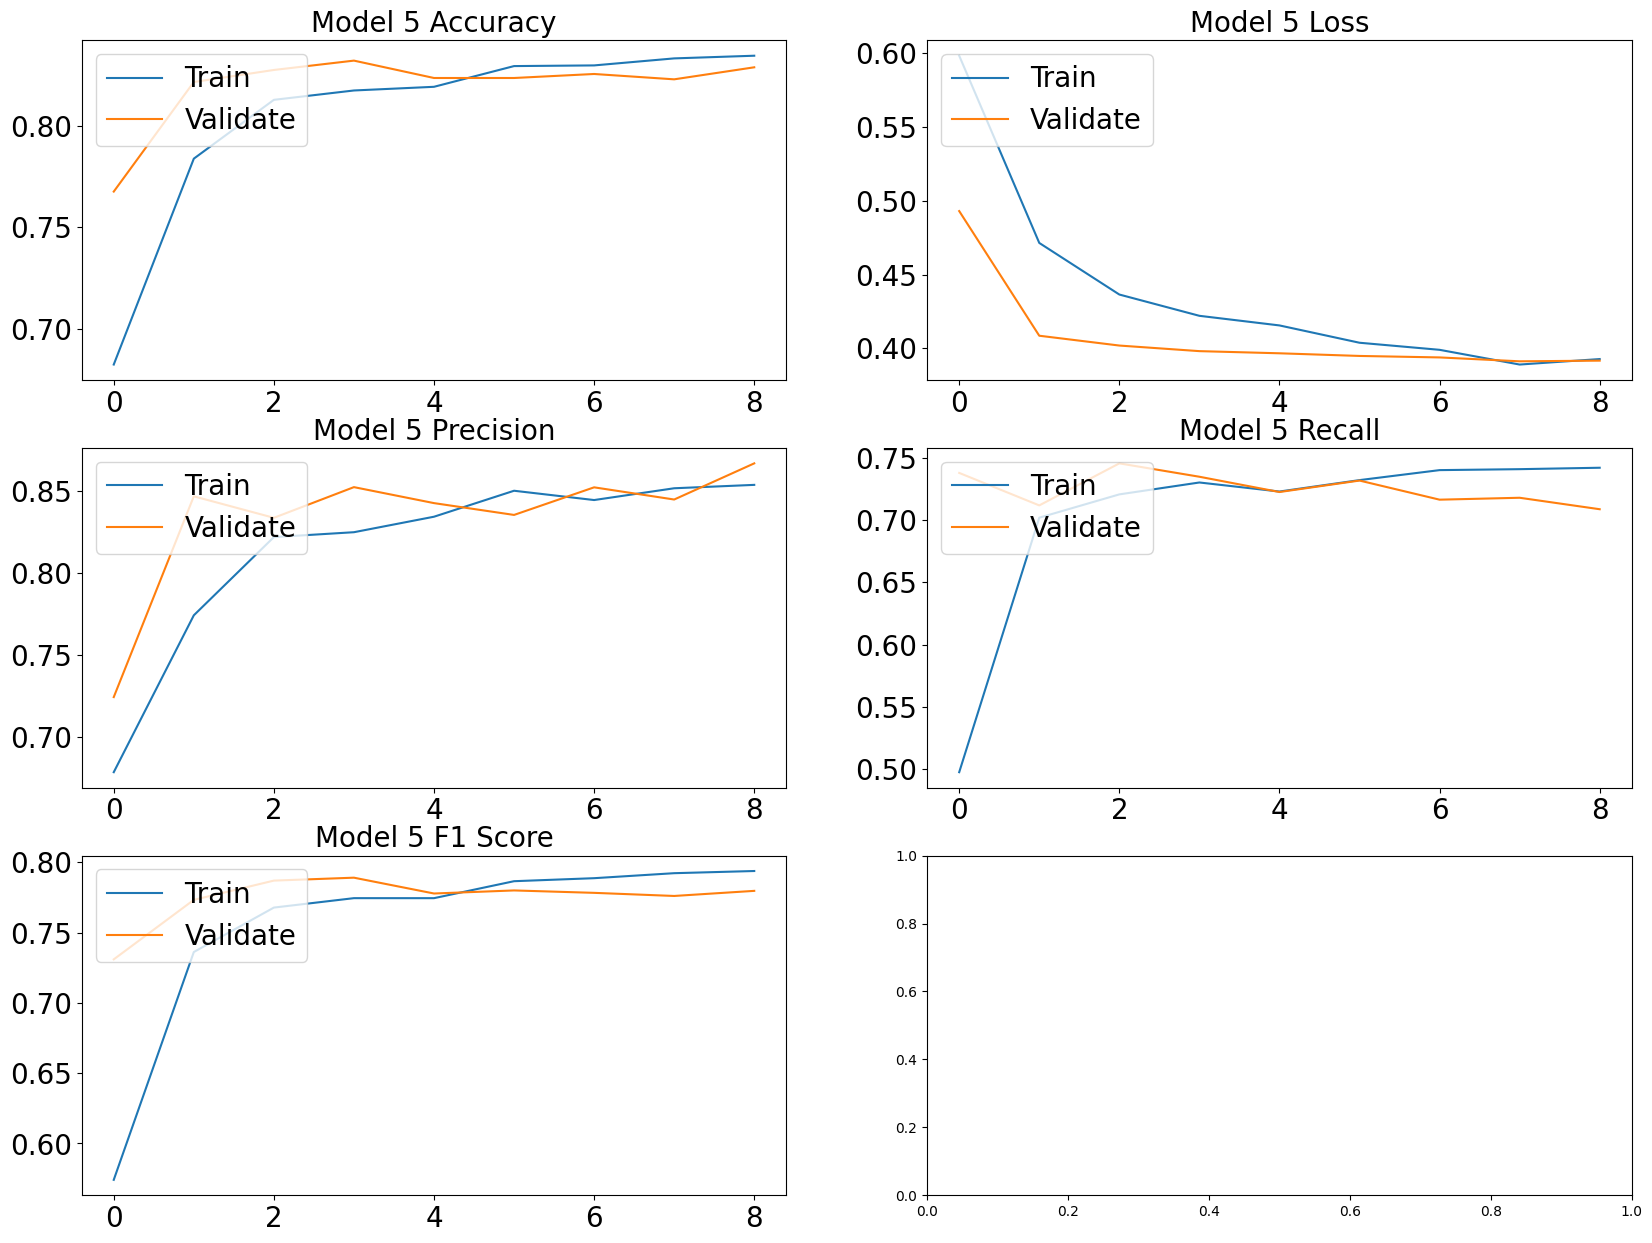

<Figure size 100x100 with 0 Axes>

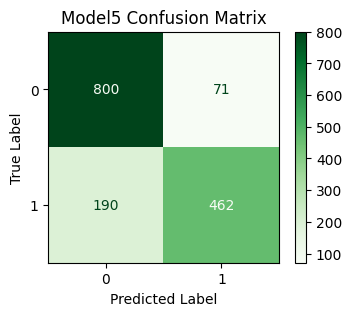

In [49]:
# Plot results
model5_val_accuracy, model5_val_precision, model5_val_recall ,model5_val_f1_scores = plot_results(history_model5, model_name='Model 5', early_stopping_callback=early_stopping_callback )
print("model 5 accuracy", model5_val_accuracy)
print("model 5 precision", model5_val_precision)
print("model 5 recall",model5_val_recall)
print("model 5 f1 score",   model5_val_f1_scores )

y_pred_model5=plot_cfm(model5, X=padded_val, y_actual= y_val, model_name='Model5')